In [10]:
import pandas as pd

df = pd.read_csv('data/3/data.csv', index_col='id')
df

,X,Y
id,,
1,6,19
2,3,11
3,10,24
4,4,14
5,2,7
6,11,26
7,23,62
8,21,47
9,20,48


In [11]:
df["X"].mean()

11.4

In [12]:
df["Y"].mean()

28.5

In [13]:
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(df.drop(['Y'], axis=1))
Y = pd.DataFrame(df['Y'])

predictor = LinearRegression().fit(X, Y)

In [17]:
import numpy as np

np.round(predictor.coef_, 2)

array([[2.25]])

In [18]:
np.round(predictor.intercept_, 2)

array([2.81])

In [20]:
np.round(predictor.score(X, Y), 2)

0.95

# Task 2

In [147]:
df = pd.read_csv('data/3/fish_train.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


In [148]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]

X, Y = split_dataset(df, 'Weight')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33, stratify=df['Species'])

In [149]:
np.round(X_train['Width'].mean(), 3)

4.511

In [150]:
df_without_categorical = df.drop('Species', axis=1)
df_without_categorical

,Weight,Length1,Length2,Length3,Height,Width
0,150.0,20.4,22.0,24.7,5.8045,3.7544
1,250.0,25.4,27.5,28.9,7.2828,4.5662
2,430.0,26.5,29.0,34.0,12.4440,5.1340
3,925.0,36.2,39.5,45.3,18.7542,6.7497
4,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...
114,273.0,23.0,25.0,28.0,11.0880,4.1440
115,500.0,42.0,45.0,48.0,6.9600,4.8960
116,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,120.0,20.0,22.0,23.5,6.1100,3.4075


In [151]:
from sklearn.metrics import r2_score

def get_r2_score(dataset):
    X, Y = split_dataset(dataset, 'Weight')
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=33, stratify=df['Species'])

    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    
    return np.round(r2_score(Y_test, Y_predicted), 3)

In [152]:
get_r2_score(df_without_categorical)

0.879

In [153]:
df_without_categorical.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.897306,0.900856,0.907401,0.745870,0.896493
Length1,0.897306,1.000000,0.999457,0.991043,0.621868,0.862072
Length2,0.900856,0.999457,1.000000,0.993469,0.638003,0.868714
Length3,0.907401,0.991043,0.993469,1.000000,0.704594,0.872468
Height,0.745870,0.621868,0.638003,0.704594,1.000000,0.783475
Width,0.896493,0.862072,0.868714,0.872468,0.783475,1.000000


### Three most correlated: Length1, Length2, Length3

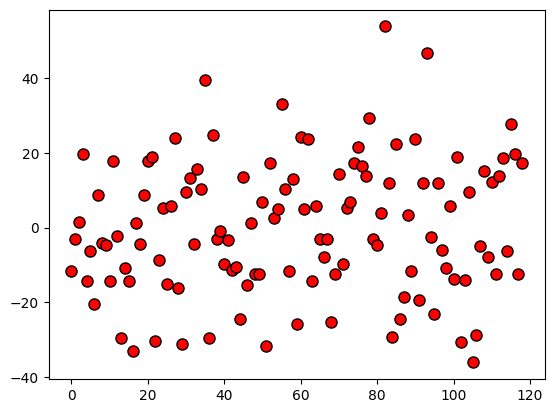

In [154]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=3, svd_solver='full')
transformed = pca.fit_transform(df[['Length1', 'Length2', 'Length3']])

plt.plot(transformed[:, 0], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

In [155]:
transformed

array([[-1.14863479e+01,  2.44624415e-01,  1.23223174e-01],
       [-3.04852601e+00, -1.03031977e+00, -1.36927938e-01],
       [ 1.55788355e+00,  1.83770190e+00,  2.25795423e-02],
       [ 1.97794399e+01,  1.88053910e+00, -3.26487628e-02],
       [-1.41719876e+01, -3.90074608e-01, -3.06307960e-01],
       [-6.33373758e+00, -8.50916759e-01, -2.09035841e-01],
       [-2.04833764e+01, -5.15897391e-01, -2.83083701e-01],
       [ 8.72987359e+00,  1.90086049e+00,  1.58850719e-01],
       [-4.07218176e+00,  3.08759073e-01, -2.31779269e-01],
       [-4.75350530e+00,  1.71187912e+00,  4.58038017e-02],
       [-1.41719876e+01, -3.90074608e-01, -3.06307960e-01],
       [ 1.78195409e+01,  1.92196568e+00, -2.25210111e-01],
       [-2.18399666e+00, -1.07753108e+00, -1.17952174e-01],
       [-2.93996892e+01, -4.48066231e-01,  3.29096707e-01],
       [-1.07138701e+01, -5.78919879e-01, -2.30404904e-01],
       [-1.42738286e+01,  2.33004294e-02,  9.21258138e-02],
       [-3.30433943e+01, -4.92894540e-01

In [156]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
explained_variance

array([0.996, 1.   , 1.   ])

In [157]:
df_without_categorical = df_without_categorical.drop(['Length1', 'Length2', 'Length3'], axis=1)
df_without_categorical['Length'] = transformed[:, 0]
df_without_categorical

,Weight,Height,Width,Length
0,150.0,5.8045,3.7544,-11.486348
1,250.0,7.2828,4.5662,-3.048526
2,430.0,12.4440,5.1340,1.557884
3,925.0,18.7542,6.7497,19.779440
4,110.0,5.6925,3.5550,-14.171988
...,...,...,...,...
114,273.0,11.0880,4.1440,-6.327814
115,500.0,6.9600,4.8960,27.717784
116,1000.0,12.3540,6.5250,19.542476
117,120.0,6.1100,3.4075,-12.442929


In [158]:
get_r2_score(df_without_categorical)

0.875

In [159]:
df_without_categorical.Length = df_without_categorical.Length ** 3 
df_without_categorical.Width = df_without_categorical.Width ** 3 
df_without_categorical.Height = df_without_categorical.Height ** 3 
df_without_categorical

,Weight,Height,Width,Length
0,150.0,195.566492,52.920218,-1515.464970
1,250.0,386.273710,95.206103,-28.331510
2,430.0,1926.992424,135.321746,3.780985
3,925.0,6596.227555,307.505871,7738.235923
4,110.0,184.462936,44.928179,-2846.376115
...,...,...,...,...
114,273.0,1363.200233,71.163818,-253.373508
115,500.0,337.153536,117.361115,21294.896091
116,1000.0,1885.483738,277.805953,7463.435167
117,120.0,228.099131,39.564674,-1926.494847


In [166]:
np.round(df_without_categorical.Width.mean(), 3)

X_cubed, Y_cubed = split_dataset(df_without_categorical, 'Weight')
    
X_train_cubed, _, _, _ = train_test_split(X_cubed, Y_cubed, test_size=0.2, random_state=33, stratify=df['Species'])

np.round(X_train_cubed.Width.mean(), 3)

130.74

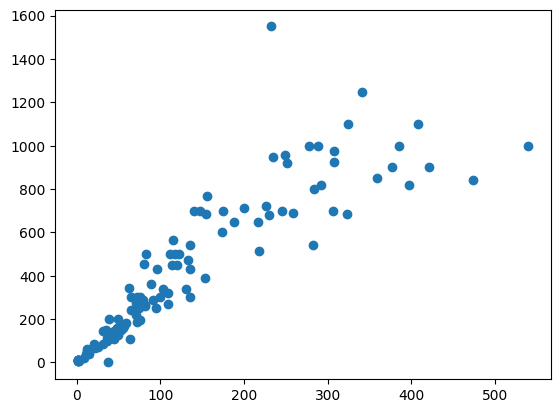

In [134]:
plt.scatter(df_without_categorical.Width, df_without_categorical.Weight)

In [135]:
get_r2_score(df_without_categorical)

0.952

In [136]:
dummies = pd.get_dummies(df['Species'])
dummies

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
114,False,True,False,False,False,False,False
115,False,False,False,True,False,False,False
116,False,False,False,False,False,False,True
117,False,False,True,False,False,False,False


In [139]:
df_categorical = df_without_categorical.join(dummies)
df_categorical

,Weight,Height,Width,Length,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,150.0,195.566492,52.920218,-1515.464970,False,False,False,False,True,False,False
1,250.0,386.273710,95.206103,-28.331510,False,False,True,False,False,False,False
2,430.0,1926.992424,135.321746,3.780985,True,False,False,False,False,False,False
3,925.0,6596.227555,307.505871,7738.235923,True,False,False,False,False,False,False
4,110.0,184.462936,44.928179,-2846.376115,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
114,273.0,1363.200233,71.163818,-253.373508,False,True,False,False,False,False,False
115,500.0,337.153536,117.361115,21294.896091,False,False,False,True,False,False,False
116,1000.0,1885.483738,277.805953,7463.435167,False,False,False,False,False,False,True
117,120.0,228.099131,39.564674,-1926.494847,False,False,True,False,False,False,False


In [140]:
get_r2_score(df_categorical)

0.945

In [141]:
dummies = pd.get_dummies(df['Species'], drop_first=True)
dummies

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,False,False,False,True,False,False
1,False,True,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
114,True,False,False,False,False,False
115,False,False,True,False,False,False
116,False,False,False,False,False,True
117,False,True,False,False,False,False


In [142]:
df_categorical2 = df_without_categorical.join(dummies)
df_categorical2

,Weight,Height,Width,Length,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,150.0,195.566492,52.920218,-1515.464970,False,False,False,True,False,False
1,250.0,386.273710,95.206103,-28.331510,False,True,False,False,False,False
2,430.0,1926.992424,135.321746,3.780985,False,False,False,False,False,False
3,925.0,6596.227555,307.505871,7738.235923,False,False,False,False,False,False
4,110.0,184.462936,44.928179,-2846.376115,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
114,273.0,1363.200233,71.163818,-253.373508,True,False,False,False,False,False
115,500.0,337.153536,117.361115,21294.896091,False,False,True,False,False,False
116,1000.0,1885.483738,277.805953,7463.435167,False,False,False,False,False,True
117,120.0,228.099131,39.564674,-1926.494847,False,True,False,False,False,False


In [143]:
get_r2_score(df_categorical2)

0.945